### 1980 - Toffoli Gate

We encounter the mpst important gates in the Quantum Circuit: the Toffoli gate. This gate is universal for classical computation, meaning that a circuit to perform any classical computation can be constructed using the Toffoli gate.


##### How Does Toffoli Gate works?

The Toffoli gate acts on three qubits, the first two serve as control and the last one is target. It performs a bit flip on the target qubit iff both the control qubits are in the 1 state.


### Problem: Construct a Toffoli gate using the basis gates (CX,RZ,SX and X gates) of IBM Quantum Systems.

In [1]:
from qiskit import QuantumCircuit, execute, BasicAer, Aer, IBMQ, QuantumRegister, ClassicalRegister

from qiskit.compiler import transpile, assemble
import numpy as np
from sympy import Matrix

#### Code to Print the Unitary Matrix for each circuit that I draw

In [9]:
def unitary(circ):
    backend = BasicAer.get_backend('unitary_simulator')
    out = execute(circ, backend).result().get_unitary()
    display(Matrix(np.round(out,10)))

### Tutorial on How to Get the Unitary Matrix

In [6]:
# suppose a simple quantum circuit

from qiskit import *
from qiskit import Aer

backend_sim = Aer.get_backend('qasm_simulator')

circ = QuantumCircuit(1,1)

# apply the Hadamard gate
circ.h(0)

# DO THE  measurement

circ.measure(range(1),range(1))

# execute
job_sim = execute(circ, backend_sim, shots = 1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)


{'0': 523, '1': 501}


In [7]:
## now on getting the unitary matrix

# change the backend

backend = Aer.get_backend('unitary_simulator')

# circuit without the measurement
circ = QuantumCircuit(1)
circ.h(0)

# execute the job
job = execute(circ, backend)
result = job.result()

# get the unitary
print(result.get_unitary(circ,decimals = 4))

[[ 0.7071+0.j  0.7071-0.j]
 [ 0.7071+0.j -0.7071+0.j]]


In [8]:
# check the process 
# for a 2 qubit

circ = QuantumCircuit(2)
circ.h(0)
circ.x(1)

job = execute(circ, backend)
result = job.result()
print(result.get_unitary(circ, decimals=3))

[[ 0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j]
 [ 0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j]]


### Back to the Problem

#### A function that Calculates the cost of the problem as given in Question

In [29]:
def cost(circ):
    circ = transpile(circ, basis_gates = ['rz','sx','x','cx'], optimization_level = 3)
    gates = circ.count_ops()
    try:
        no_rz = gates['rz']    # number of RZ gate
    except:
        no_rz = 0
    try:
        no_sx = gates['sx']    # number of SX gates
    except:
        no_sx = 0
    try:
        no_x = gates['x']      # number of X gates
    except:
        no_x = 0
    try:
        no_cx = gates['cx']    # number of CX gates
    except:
        no_cx = 0
    cost = no_rz + no_sx + no_x + 10*no_cx
    
    print(cost)
    

### How to get less Cost

In [11]:
# get the unitary for the Toffoli gate

qc = QuantumCircuit(3)
qc.ccx(0,1,2)
unitary(qc)

Matrix([
[1.0,   0,   0,   0,   0,   0,   0,   0],
[  0, 1.0,   0,   0,   0,   0,   0,   0],
[  0,   0, 1.0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0, 1.0],
[  0,   0,   0,   0, 1.0,   0,   0,   0],
[  0,   0,   0,   0,   0, 1.0,   0,   0],
[  0,   0,   0,   0,   0,   0, 1.0,   0],
[  0,   0,   0, 1.0,   0,   0,   0,   0]])

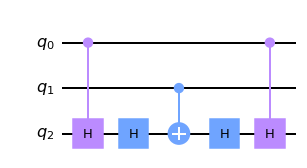

In [12]:
# now a circuit that resembels this matrix

qc = QuantumCircuit(3)

qc.ch(0,2)
qc.h(2)
qc.cx(1,2)
qc.h(2)
qc.ch(0,2)

qc.draw('mpl')

In [13]:
unitary(qc)

Matrix([
[1.0,   0,   0,   0,   0,   0,    0,   0],
[  0, 1.0,   0,   0,   0,   0,    0,   0],
[  0,   0, 1.0,   0,   0,   0,    0,   0],
[  0,   0,   0,   0,   0,   0,    0, 1.0],
[  0,   0,   0,   0, 1.0,   0,    0,   0],
[  0,   0,   0,   0,   0, 1.0,    0,   0],
[  0,   0,   0,   0,   0,   0, -1.0,   0],
[  0,   0,   0, 1.0,   0,   0,    0,   0]])

Here we are getting a phase difference of -1 in the (7,7) element

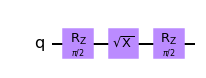

In [14]:
# building an Hadamard gate
def hadamard(qc, target):
    qc.rz(np.pi/2, target)
    qc.sx(target)
    qc.rz(np.pi/2, target)
    
qc = QuantumCircuit(1)
hadamard(qc,0)
qc.draw('mpl')

In [15]:
unitary(qc)

Matrix([
[0.5 - 0.5*I,  0.5 - 0.5*I],
[0.5 - 0.5*I, -0.5 + 0.5*I]])

This doesn't looks  like the Unitary Matrix of an Hadamard gate, 

In [16]:
# this is what the Unitary Matrix of the Hadamard gate looks like
qc = QuantumCircuit(1)
qc.h(0)
unitary(qc)

Matrix([
[0.7071067812,  0.7071067812],
[0.7071067812, -0.7071067812]])

As you can see, the matrices are indeed different. However, this is only a phase difference. You can see this by comparing the norm of each element between the two matrices, they are all equal to $1/\sqrt{2}$.

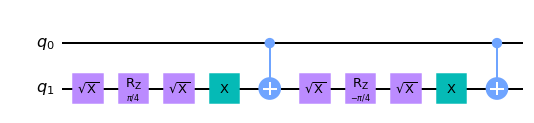

In [18]:
# making the Controlled hadamard gate
def c_hadamard(qc, control, target):
    qc.sx(target)
    qc.rz(np.pi/4, target)
    qc.sx(target)
    qc.x(target)

    qc.cx(control,target)

    # Ry -pi/4
    qc.sx(target)
    qc.rz(-np.pi/4, target)
    qc.sx(target)
    qc.x(target)

    qc.cx(control,target)
    
    return qc

qc = QuantumCircuit(2)
c_hadamard(qc, 0, 1)
qc.draw('mpl')

In [19]:
unitary(qc)

Matrix([
[1.0,            0,   0,             0],
[  0, 0.7071067812,   0, -0.7071067812],
[  0,            0, 1.0,             0],
[  0, 0.7071067812,   0,  0.7071067812]])

In [20]:
# comparing it to the unitary of the original C-Hadamard gate
qc = QuantumCircuit(2)
qc.ch(0,1)
unitary(qc)

Matrix([
[1.0,            0,   0,             0],
[  0, 0.7071067812,   0,  0.7071067812],
[  0,            0, 1.0,             0],
[  0, 0.7071067812,   0, -0.7071067812]])

As you can see, this gate again introduces some more phase difference, this case in two elements of the matrix.

In [31]:
# we also need to define the inverse of the controlled hadamard gate

def c_hadamard_dag(qc, control, target):
    # Ry -pi/4
    qc.sx(target)
    qc.rz(-np.pi/4, target)
    qc.sx(target)
    qc.x(target)

    qc.cx(control,target)

    # Ry pi/4
    qc.sx(target)
    qc.rz(np.pi/4, target)
    qc.sx(target)
    qc.x(target)

    qc.cx(control,target)
    
    return qc

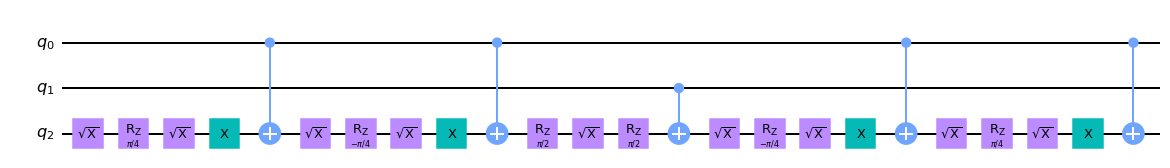

In [32]:
# now building the circuit

circuit = QuantumCircuit(3)

c_hadamard(circuit, 0, 2)
hadamard(circuit, 2)
circuit.cx(1,2)
c_hadamard_dag(circuit, 0,2)

circuit.draw(output='mpl')

In [35]:
unitary(circuit)

Matrix([
[0.5 - 0.5*I,            0,           0,           0,  0.5 - 0.5*I,            0,            0,            0],
[          0,  0.5 - 0.5*I,           0,           0,            0, -0.5 + 0.5*I,            0,            0],
[          0,            0, 0.5 - 0.5*I,           0,            0,            0, -0.5 + 0.5*I,            0],
[          0,            0,           0, 0.5 - 0.5*I,            0,            0,            0, -0.5 + 0.5*I],
[0.5 - 0.5*I,            0,           0,           0, -0.5 + 0.5*I,            0,            0,            0],
[          0, -0.5 + 0.5*I,           0,           0,            0, -0.5 + 0.5*I,            0,            0],
[          0,            0, 0.5 - 0.5*I,           0,            0,            0,  0.5 - 0.5*I,            0],
[          0,            0,           0, 0.5 - 0.5*I,            0,            0,            0,  0.5 - 0.5*I]])

In [34]:
cost(circuit)

69


### Easier Way

72


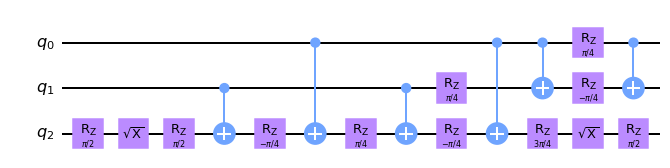

In [36]:
circ = QuantumCircuit(3)

circ.rz(np.pi/2, 2)
circ.sx(2)
circ.rz(np.pi/2, 2)
circ.cx(1, 2)
circ.rz(-np.pi/4, 2)
circ.cx(0, 2)
circ.rz(np.pi/4, 2)
circ.cx(1, 2)
circ.rz(np.pi/4, 1)
circ.rz(-np.pi/4, 2)
circ.cx(0, 2)
circ.cx(0, 1)
circ.rz(3*np.pi/4, 2)
circ.rz(np.pi/4, 0)
circ.rz(-np.pi/4, 1)
circ.sx(2)
circ.cx(0, 1)
circ.rz(np.pi/2, 2)

cost(circ)
circ.draw(output='mpl')

In [37]:
unitary(circ)

Matrix([
[-0.3826834324 - 0.9238795325*I,                              0,                              0,                              0,                              0,                              0,                              0,                              0],
[                             0, -0.3826834324 - 0.9238795325*I,                              0,                              0,                              0,                              0,                              0,                              0],
[                             0,                              0, -0.3826834324 - 0.9238795325*I,                              0,                              0,                              0,                              0,                              0],
[                             0,                              0,                              0,                              0,                              0,                              0,                         